# Exercise: Global poverty - creating a custom stack plot (solution)

## I. Prepare your data for plotting

In [1]:
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file = "data/poverty-dollars-a-day.csv"
poverty = pd.read_csv(file)
poverty.head(5)

,Year,$30 or more,$10-$30,$5-$10,$1.90-$5,$1.90 or less
0,1820,537628,7143444,29523314,169391904,794510917
1,1830,585831,8085936,33032595,181653002,851972581
2,1840,576336,9229552,37482730,188946658,889888153
3,1850,485850,10391368,42552653,197089462,921709511
4,1860,874791,14710723,49955096,206453158,918913757


In [2]:
# Prepare the data
income_levels = ["$1.90 or less", "$1.90-$5", "$5-$10", "$10-$30", "$30 or more"]
data = poverty[income_levels]

scaled_poverty = data.div(data.sum(axis=1), axis=0) * 100
scaled_poverty.head(5)

,$1.90 or less,$1.90-$5,$5-$10,$10-$30,$30 or more
0,79.363220,16.920456,2.949066,0.713554,0.053703
1,79.228946,16.892769,3.071857,0.751949,0.054479
2,79.022257,16.778503,3.328474,0.819586,0.051179
3,78.628803,16.813224,3.630064,0.886462,0.041447
4,77.160799,17.335784,4.194708,1.235253,0.073456


## II. Make a simple plot of your data (Level 1)

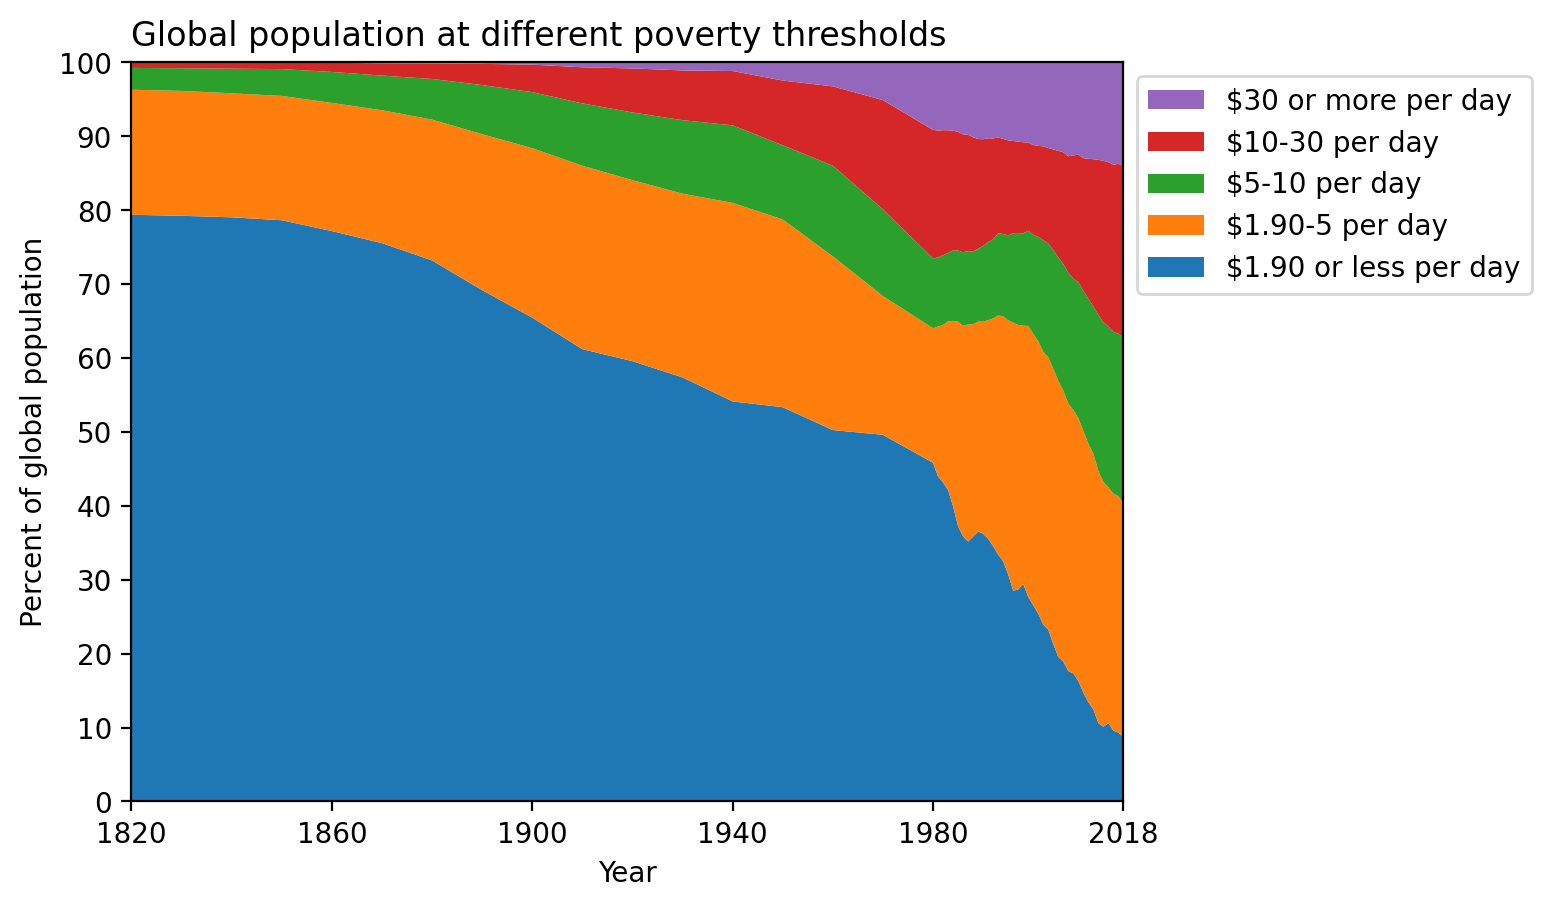

In [3]:
# Prepare the data in the right format for `stackplot`
x = poverty["Year"].values
Y = scaled_poverty[income_levels].values.T # Stackplot takes the data formatted with the time axis in the second dimension, so we transpose the matrix

# Create legend labels to plot
legend_labels = ["$1.90 or less per day", "$1.90-5 per day", "$5-10 per day", "$10-30 per day", "$30 or more per day"]

# Plot the figure
fig, ax = plt.subplots()
ax.stackplot(x, Y, labels=legend_labels)
ax.set_xlim([min(x), max(x)])
ax.set_ylim([0, 100])
ax.set_xticks(np.append(np.arange(1820, 2018, 40), [2018]))
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel("Percent of global population")
ax.set_xlabel("Year")
ax.set_title("Global population at different poverty thresholds", loc="left")
ax.legend(bbox_to_anchor=(1, 1),
          loc="upper left",
          reverse=True) #Adjusts the order of the legend entries to match the order top-to-bottom

# Save the output
fig.savefig('img/worked_example_poverty_level_1.png', dpi=600, bbox_inches = 'tight')

## III. Make a professional-quality plot (Level 2 - OPTIONAL)

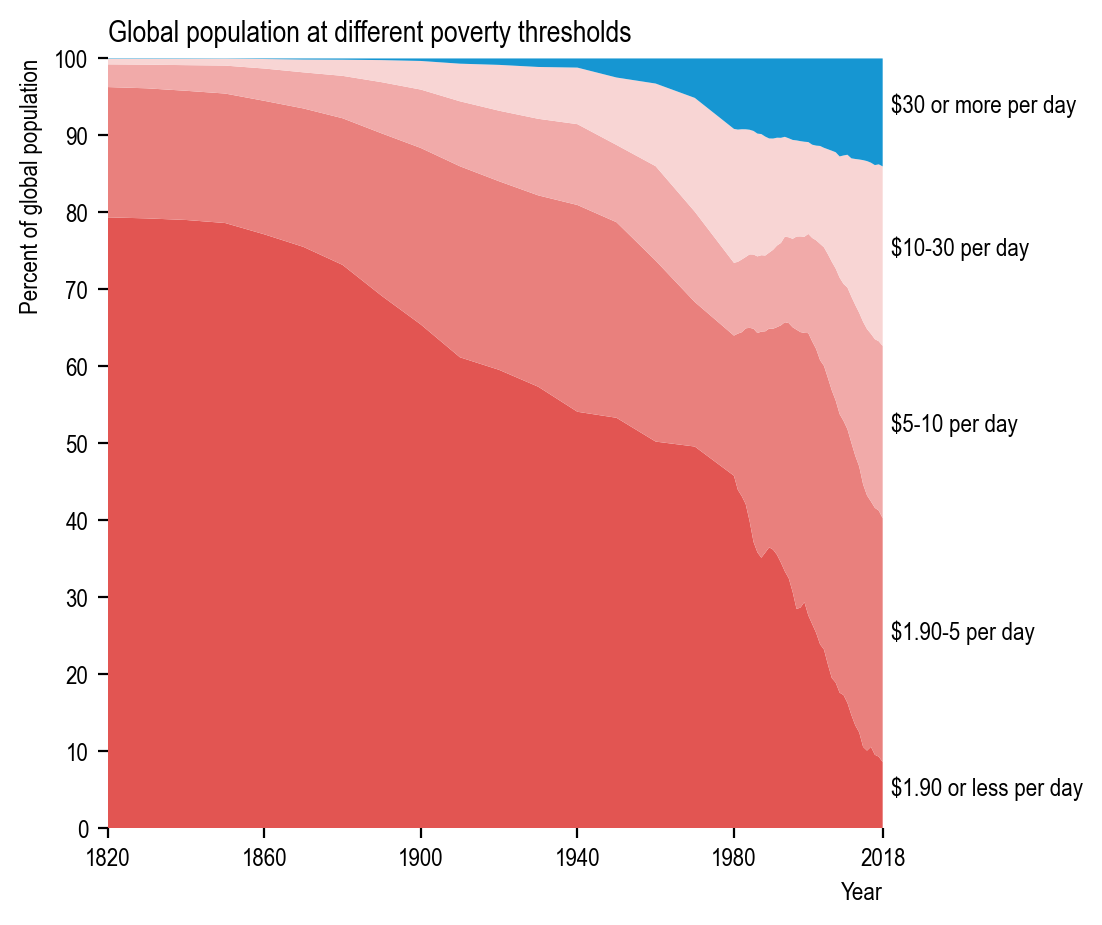

In [4]:
colors = ["#e25552", "#e9807d", "#f1aaa9", "#f8d5d4", "#1696d2"]

# Set the font size
plt.rcParams["font.size"] = 9
plt.rcParams["font.sans-serif"] = [
    "Arial Narrow",
    "DejaVu Sans",
    "Lucida Grande",
    "Verdana",
]

# Prepare the data as before
x = poverty["Year"].values
Y = scaled_poverty[income_levels].values.T

# Make the main plot as before
fig, ax = plt.subplots(figsize=(5,5))
ax.stackplot(x, Y, colors=colors) # Set the colors of the plot
ax.set_xlim([min(x), max(x)])
ax.set_ylim([0, 100])
ax.set_xticks(np.append(np.arange(1820, 2018, 40), [2018]))
ax.set_yticks(np.arange(0, 101, 10))
ax.spines[:].set_visible(False)
ax.set_ylabel("Percent of global population", loc="top")
ax.set_xlabel("Year", loc='right')
ax.set_title("Global population at different poverty thresholds", loc="left")

# Add labels to the side of the plot
poverty2018 = scaled_poverty.iloc[-1]
data = poverty2018.values
cum_data = np.concatenate(([0], np.cumsum(data)))
maxyear = x.max()
cum_data

for i, label in enumerate(legend_labels):
    ax.text(maxyear + 2, cum_data[i] + data[i] / 2, label)
    
# Save the figure
fig.savefig('img/worked_example_poverty_level_2.png', dpi=600, bbox_inches = 'tight')